**MINST Data Classification**

In [ ]:
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

In [ ]:
batch_size = 128
num_classes = 10
epochs = 12

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, 28, 28)
    x_test = x_test.reshape(x_test.shape[0], 1, 28, 28)
    input_shape = (1, 28, 28)
else:
    x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
    x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
    input_shape = (28, 28, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Epoch 1/12
469/469 [==============================] - 170s 362ms/step - loss: 0.9783 - accuracy: 0.7077 - val_loss: 0.7398 - val_accuracy: 0.8312
Epoch 2/12
469/469 [==============================] - 169s 361ms/step - loss: 0.9217 - accuracy: 0.7204 - val_loss: 0.6840 - val_accuracy: 0.8377
Epoch 3/12
469/469 [==============================] - 171s 366ms/step - loss: 0.8731 - accuracy: 0.7348 - val_loss: 0.6386 - val_accuracy: 0.8450
Epoch 4/12
469/469 [==============================] - 170s 362ms/step - loss: 0.8309 - accuracy: 0.7468 - val_loss: 0.6016 - val_accuracy: 0.8513
Epoch 5/12
469/469 [==============================] - 170s 362ms/step - loss: 0.7961 - accuracy: 0.7566 - val_loss: 0.5696 - val_accuracy: 0.8563
Epoch 6/12
469/469 [==============================] - 175s 373ms/step - loss: 0.7652 - accuracy: 0.7661 - val_loss: 0.5433 - val_accuracy: 0.8629
Epoch 7/12
469/469 [==============================] - 173s 369ms/step - loss: 0.7417 - accuracy: 0.7725 - val_loss: 0.5213 -

In [ ]:
import matplotlib.pyplot as plt

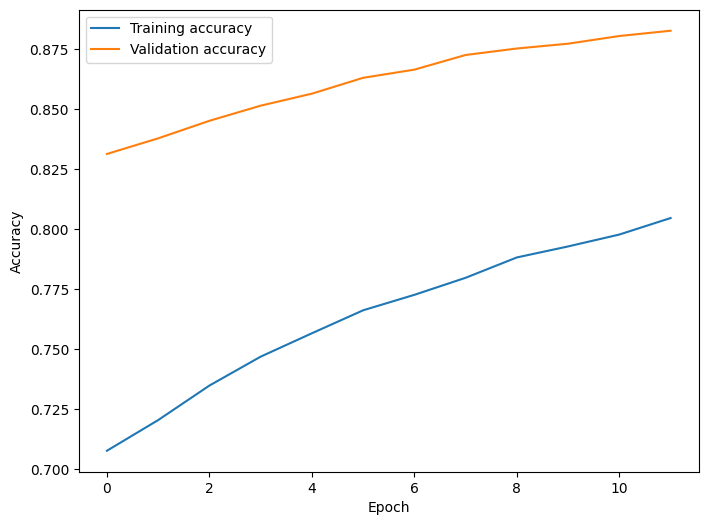

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

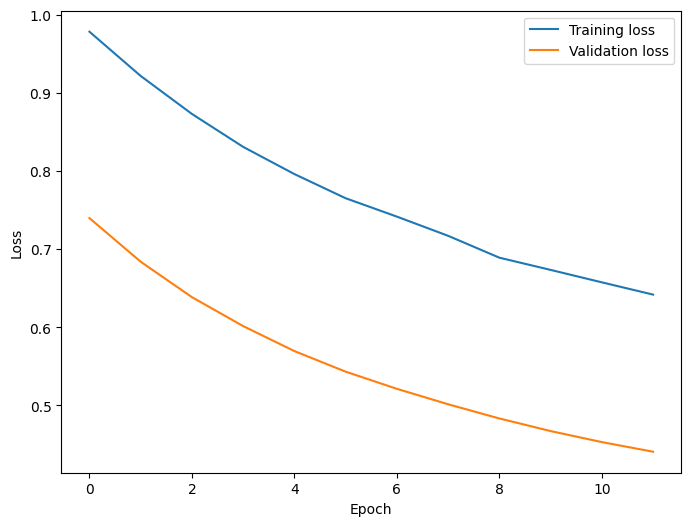

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.44084927439689636
Test accuracy: 0.8824999928474426


In [ ]:
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)

313/313 [==============================] - 8s 25ms/step


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

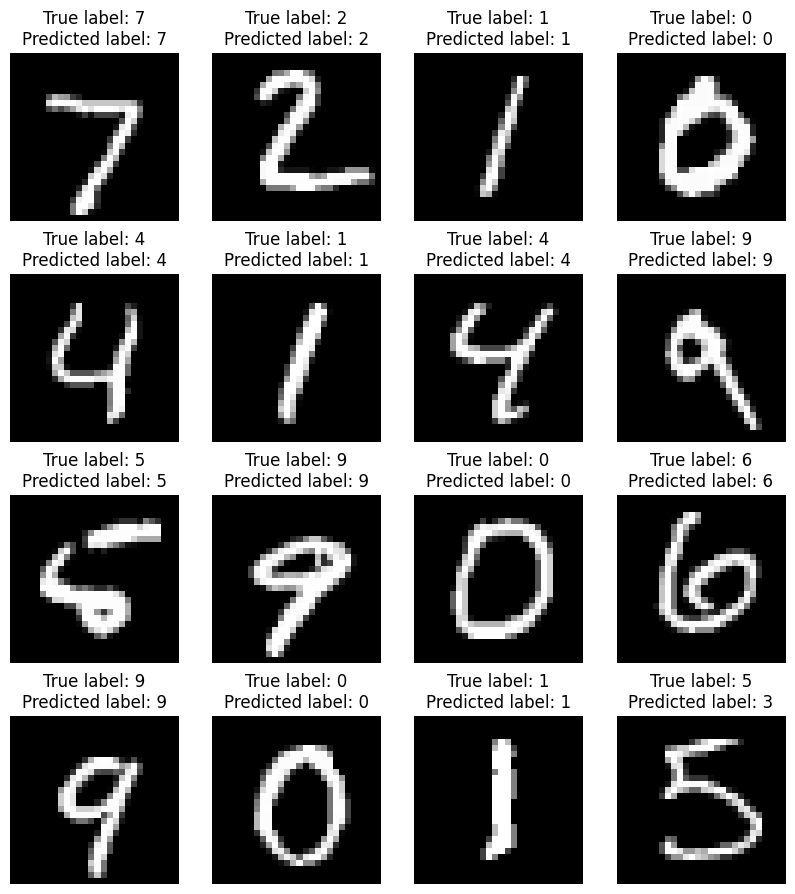

In [ ]:
plt.figure(figsize=(10, 11))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(x_test[i].reshape((28, 28)), cmap='gray')
    plt.title('True label: {}\nPredicted label: {}'.format(np.argmax(y_test[i]), predicted_labels[i]))
    plt.axis('off')
plt.tight_layout